# Sales forecasting

In [29]:
import pandas as pd
import numpy as np


In [30]:
df=pd.read_csv('C:/Users/sawan/e-commerce_Project/data/processed/ecommerce_data_clean.csv',encoding='latin1')


In [31]:
customer_data= pd.read_csv('C:/Users/sawan/e-commerce_Project/data/processed/customer_data.csv',encoding='latin1')

In [32]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,totalprice,date,dayofweek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2


In [33]:
customer_data.head()

,customerid,date,Days_Since_Last_Purchase,totalprice,Average_Transaction_Value
0,12346.0,2011-01-18,325,0.00,0.000000
1,12347.0,2011-12-07,2,4310.00,23.681319
2,12348.0,2011-09-25,75,1437.24,53.231111
3,12349.0,2011-11-21,18,1457.55,20.243750
4,12350.0,2011-02-02,310,294.40,18.400000


In [34]:
# customer_data.drop(columns=['date'], inplace=True)

In [35]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('customerid')['invoiceno'].nunique().reset_index()
total_transactions.rename(columns={'invoiceno': 'Total_Transactions'}, inplace=True)

In [36]:
total_transactions

,customerid,Total_Transactions
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4357,18280.0,1
4358,18281.0,1
4359,18282.0,3
4360,18283.0,16


In [37]:
# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('customerid')['quantity'].sum().reset_index()
total_products_purchased.rename(columns={'quantity': 'Total_Products_Purchased'}, inplace=True)

In [38]:
# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='customerid')
customer_data = pd.merge(customer_data, total_products_purchased, on='customerid')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,customerid,date,Days_Since_Last_Purchase,totalprice,Average_Transaction_Value,Total_Transactions,Total_Products_Purchased
0,12346.0,2011-01-18,325,0.00,0.000000,2,0
1,12347.0,2011-12-07,2,4310.00,23.681319,7,2458
2,12348.0,2011-09-25,75,1437.24,53.231111,4,2332
3,12349.0,2011-11-21,18,1457.55,20.243750,1,630
4,12350.0,2011-02-02,310,294.40,18.400000,1,196


In [39]:
customer_data.rename(columns={'totalprice': 'total_spend'}, inplace=True)

In [40]:
customer_data.head()

,customerid,date,Days_Since_Last_Purchase,total_spend,Average_Transaction_Value,Total_Transactions,Total_Products_Purchased
0,12346.0,2011-01-18,325,0.00,0.000000,2,0
1,12347.0,2011-12-07,2,4310.00,23.681319,7,2458
2,12348.0,2011-09-25,75,1437.24,53.231111,4,2332
3,12349.0,2011-11-21,18,1457.55,20.243750,1,630
4,12350.0,2011-02-02,310,294.40,18.400000,1,196


In [41]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df.groupby('customerid')['stockcode'].nunique().reset_index()
unique_products_purchased.rename(columns={'stockcode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='customerid')
customer_data.head()

,customerid,date,Days_Since_Last_Purchase,total_spend,Average_Transaction_Value,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased
0,12346.0,2011-01-18,325,0.00,0.000000,2,0,1
1,12347.0,2011-12-07,2,4310.00,23.681319,7,2458,103
2,12348.0,2011-09-25,75,1437.24,53.231111,4,2332,21
3,12349.0,2011-11-21,18,1457.55,20.243750,1,630,72
4,12350.0,2011-02-02,310,294.40,18.400000,1,196,16


# Behavorial features

1. Average Days Between Purchases: This feature represents the average number of days a customer waits before making another purchase. 
2. Favorite Shopping Day: This denotes the day of the week when the customer shops the most.

3. Favorite Shopping Hour: This refers to the hour of the day when the customer shops the most. 

In [42]:
# Extract day of the week and hour from the invoice date
df['invoice_date'] = pd.to_datetime(df['invoicedate'])
df['day_of_week'] = df['invoice_date'].dt.day_name()
df['hour'] = df['invoice_date'].dt.hour

In [43]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,totalprice,date,dayofweek,invoice_date,day_of_week,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2,2010-12-01 08:26:00,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2,2010-12-01 08:26:00,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2,2010-12-01 08:26:00,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2,2010-12-01 08:26:00,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2,2010-12-01 08:26:00,Wednesday,8


In [44]:
# Calculate differences between consecutive dates
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
# Sort the DataFrame by customer and date
df = df.sort_values(['customerid', 'invoicedate'])

# Calculate the difference between consecutive purchases per customer
df['days_diff'] = df.groupby('customerid')['invoicedate'].diff().dt.days

# Compute the average days between purchases for each customer
average_days_between_purchases = (
    df.groupby('customerid')['days_diff'].mean().reset_index()
)

# Rename the column for clarity
average_days_between_purchases.rename(
    columns={'days_diff': 'Average_Days_Between_Purchases'},
    inplace=True
)

In [45]:
# Finding favorite shopping day

df['invoicedate'] = pd.to_datetime(df['invoicedate'])

# Extract the day of week 
df['day_of_week'] = df['invoicedate'].dt.day_of_week

# Find the most frequent shopping day for each customer
fav_day = (
    df.groupby(['customerid', 'day_of_week'])
      .size()
      .reset_index(name='count')
      .sort_values(['customerid', 'count'], ascending=[True, False])
      .drop_duplicates('customerid')
      .reset_index(drop=True)
)

# Rename for clarity
fav_day.rename(columns={'day_of_week': 'Favorite_Shopping_Day'}, inplace=True)

In [46]:
# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['customerid', 'hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('customerid')['Count'].idxmax()][['customerid', 'hour']]
favorite_shopping_hour.rename(columns={'hour': 'Favorite_Shopping_Hour'}, inplace=True)

In [47]:
# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='customerid')
customer_data = pd.merge(customer_data, fav_day, on='customerid')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='customerid')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,customerid,date,Days_Since_Last_Purchase,total_spend,Average_Transaction_Value,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,count,Favorite_Shopping_Hour
0,12346.0,2011-01-18,325,0.00,0.000000,2,0,1,0.000000,1,2,10
1,12347.0,2011-12-07,2,4310.00,23.681319,7,2458,103,2.000000,1,53,14
2,12348.0,2011-09-25,75,1437.24,53.231111,4,2332,21,10.846154,3,16,19
3,12349.0,2011-11-21,18,1457.55,20.243750,1,630,72,0.000000,0,72,9
4,12350.0,2011-02-02,310,294.40,18.400000,1,196,16,0.000000,2,16,16


In [48]:
customer_data.drop(columns=['count'], inplace=True)

In [49]:
customer_data.head()

,customerid,date,Days_Since_Last_Purchase,total_spend,Average_Transaction_Value,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour
0,12346.0,2011-01-18,325,0.00,0.000000,2,0,1,0.000000,1,10
1,12347.0,2011-12-07,2,4310.00,23.681319,7,2458,103,2.000000,1,14
2,12348.0,2011-09-25,75,1437.24,53.231111,4,2332,21,10.846154,3,19
3,12349.0,2011-11-21,18,1457.55,20.243750,1,630,72,0.000000,0,9
4,12350.0,2011-02-02,310,294.40,18.400000,1,196,16,0.000000,2,16


# Geographic features

In [50]:
df['country'].value_counts(normalize=True).head()


country
United Kingdom    0.890991
Germany           0.022720
France            0.020398
EIRE              0.018436
Spain             0.006160
Name: proportion, dtype: float64

Given that a substantial portion (89%) of transactions are originating from the United Kingdom, we might consider creating a binary feature indicating whether the transaction is from the UK or not.

In [51]:
# create a new feature called is_uk 
# Step 1: Create customer-level is_uk from original df
customer_is_uk = (
    df.groupby('customerid')['country']
      .first()  # or mode() if customer could have multiple countries
      .reset_index()
)
customer_is_uk['is_uk'] = (customer_is_uk['country'].str.lower() == 'united kingdom').astype(int)
customer_is_uk = customer_is_uk[['customerid', 'is_uk']]

# Step 2: Merge into customersales
customer_data = customer_data.merge(customer_is_uk, on='customerid', how='left')


In [52]:
customer_data.head()

,customerid,date,Days_Since_Last_Purchase,total_spend,Average_Transaction_Value,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour,is_uk
0,12346.0,2011-01-18,325,0.00,0.000000,2,0,1,0.000000,1,10,1
1,12347.0,2011-12-07,2,4310.00,23.681319,7,2458,103,2.000000,1,14,0
2,12348.0,2011-09-25,75,1437.24,53.231111,4,2332,21,10.846154,3,19,0
3,12349.0,2011-11-21,18,1457.55,20.243750,1,630,72,0.000000,0,9,0
4,12350.0,2011-02-02,310,294.40,18.400000,1,196,16,0.000000,2,16,0


In [53]:
customer_data['is_uk'].value_counts()

is_uk
1    3942
0     420
Name: count, dtype: int64

# Seasonality trends

 We will make 3 new features:
 1. Monthly spending mean
 2. Monthly spending std - This feature indicates the variability in a customer's monthly spending. 
 3. spending trend (slope of the linear regression line of monthly spending over time) - This reflects the trend in a customer's spending over time, calculated as the slope of the linear trend line fitted to their spending data.

In [54]:
# Extract month and year from invoicedate
df['year'] = df['invoicedate'].dt.year
df['month'] = df['invoicedate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['customerid', 'year', 'month'])['totalprice'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('customerid')['totalprice'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends

from scipy.stats import linregress
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0
    
# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('customerid')['totalprice'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'totalprice': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='customerid')
customer_data = pd.merge(customer_data, spending_trends, on='customerid')


C:\Users\sawan\AppData\Local\Temp\ipykernel_10628\3656521313.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)


In [55]:
customer_data.head()

,customerid,date,Days_Since_Last_Purchase,total_spend,Average_Transaction_Value,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour,is_uk,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2011-01-18,325,0.00,0.000000,2,0,1,0.000000,1,10,1,0.000000,0.000000,0.000000
1,12347.0,2011-12-07,2,4310.00,23.681319,7,2458,103,2.000000,1,14,0,615.714286,341.070789,4.486071
2,12348.0,2011-09-25,75,1437.24,53.231111,4,2332,21,10.846154,3,19,0,359.310000,203.875689,-100.884000
3,12349.0,2011-11-21,18,1457.55,20.243750,1,630,72,0.000000,0,9,0,1457.550000,0.000000,0.000000
4,12350.0,2011-02-02,310,294.40,18.400000,1,196,16,0.000000,2,16,0,294.400000,0.000000,0.000000


In [56]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['customerid'] = customer_data['customerid'].astype(str)

customer_data['Favorite_Shopping_Day']= customer_data['Favorite_Shopping_Day'].astype(int)

In [57]:
customer_data.dtypes

customerid                         object
date                               object
Days_Since_Last_Purchase            int64
total_spend                       float64
Average_Transaction_Value         float64
Total_Transactions                  int64
Total_Products_Purchased            int64
Unique_Products_Purchased           int64
Average_Days_Between_Purchases    float64
Favorite_Shopping_Day               int64
Favorite_Shopping_Hour              int32
is_uk                               int64
Monthly_Spending_Mean             float64
Monthly_Spending_Std              float64
Spending_Trend                    float64
dtype: object

In [58]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customerid                      4362 non-null   object 
 1   date                            4362 non-null   object 
 2   Days_Since_Last_Purchase        4362 non-null   int64  
 3   total_spend                     4362 non-null   float64
 4   Average_Transaction_Value       4362 non-null   float64
 5   Total_Transactions              4362 non-null   int64  
 6   Total_Products_Purchased        4362 non-null   int64  
 7   Unique_Products_Purchased       4362 non-null   int64  
 8   Average_Days_Between_Purchases  4285 non-null   float64
 9   Favorite_Shopping_Day           4362 non-null   int64  
 10  Favorite_Shopping_Hour          4362 non-null   int32  
 11  is_uk                           4362 non-null   int64  
 12  Monthly_Spending_Mean           43

In [59]:
# Aggregate sales data by date
sales_data = df.groupby('invoicedate').agg({'totalprice': 'sum'}).reset_index()


In [60]:
# Convert 'invoicedate' to datetime

sales_data['invoicemonth'] = pd.to_datetime(sales_data['invoicedate']).dt.month

In [61]:
sales_data.head()
sales_data['invoicemonth'].nunique()

12

In [62]:
# Aggregate sales data by product category
category_sales = df.groupby('description').agg({'totalprice': 'sum'}).reset_index()
category_sales=category_sales.sort_values(by='totalprice' , ascending=False)

In [63]:
# Top 10 product categories by sales
category_sales.head(10)

,description,totalprice
2772,REGENCY CAKESTAND 3 TIER,132567.70
3708,WHITE HANGING HEART T-LIGHT HOLDER,93767.80
1766,JUMBO BAG RED RETROSPOT,83056.52
2348,PARTY BUNTING,67628.43
217,ASSORTED COLOUR BIRD ORNAMENT,56331.91
2661,RABBIT NIGHT LIGHT,51042.84
723,CHILLI LIGHTS,45915.41
2316,PAPER CHAIN KIT 50'S CHRISTMAS,41423.78
2398,PICNIC BASKET WICKER 60 PIECES,39619.50
376,BLACK RECORD COVER FRAME,38990.63


In [65]:
customer_data.head()    

,customerid,date,Days_Since_Last_Purchase,total_spend,Average_Transaction_Value,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour,is_uk,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2011-01-18,325,0.00,0.000000,2,0,1,0.000000,1,10,1,0.000000,0.000000,0.000000
1,12347.0,2011-12-07,2,4310.00,23.681319,7,2458,103,2.000000,1,14,0,615.714286,341.070789,4.486071
2,12348.0,2011-09-25,75,1437.24,53.231111,4,2332,21,10.846154,3,19,0,359.310000,203.875689,-100.884000
3,12349.0,2011-11-21,18,1457.55,20.243750,1,630,72,0.000000,0,9,0,1457.550000,0.000000,0.000000
4,12350.0,2011-02-02,310,294.40,18.400000,1,196,16,0.000000,2,16,0,294.400000,0.000000,0.000000


# Outlier detection and treatment

Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect outliers in multi-dimensional spaces. I am going to use the Isolation Forest algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

In [67]:
from sklearn.ensemble import IsolationForest
# Initializing the IsolationForest model with a contamination parameter of 0.05
# contamination=0.05 → We expect 5% of the data to be anomalies/outliers.
model = IsolationForest(contamination=0.05, random_state=22)

X = customer_data.drop(columns=['customerid', 'Days_Since_Last_Purchase'])

# Ensure only numeric columns remain
X = X.select_dtypes(include=[np.number]).fillna(0)
customer_data['Outlier_Scores'] = model.fit_predict(X.to_numpy())

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
# customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].fillna(0).to_numpy()) #select all the columns except the first one (customer id)

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
# having 0 and 1 for outliers is more intiuitive for further analysis
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]


In [68]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100
print("Percentage of outliers:")
print(outlier_percentage)

Percentage of outliers:
Is_Outlier
0    94.979367
1     5.020633
Name: proportion, dtype: float64


Considering the nature of the project (customer segmentation using clustering), it is crucial to handle these outliers to prevent them from affecting the clusters' quality significantly. Therefore, I will separate these outliers for further analysis and remove them from our main dataset to prepare it for the clustering analysis.

Let's proceed with the following steps:

Separate the identified outliers for further analysis and save them as a separate file (optional).
Remove the outliers from the main dataset to prevent them from influencing the clustering process.
Drop the Outlier_Scores and Is_Outlier columns as they were auxiliary columns used for the outlier detection process.

In [69]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

In [70]:
outliers_data.to_csv('C:/Users/sawan/e-commerce_Project/data/processed/outliers_data.csv', index=False)

In [75]:
customer_data_cleaned['date']=pd.to_datetime(customer_data_cleaned['date'])

Text(0.5, 1.0, 'Correlation Matrix')

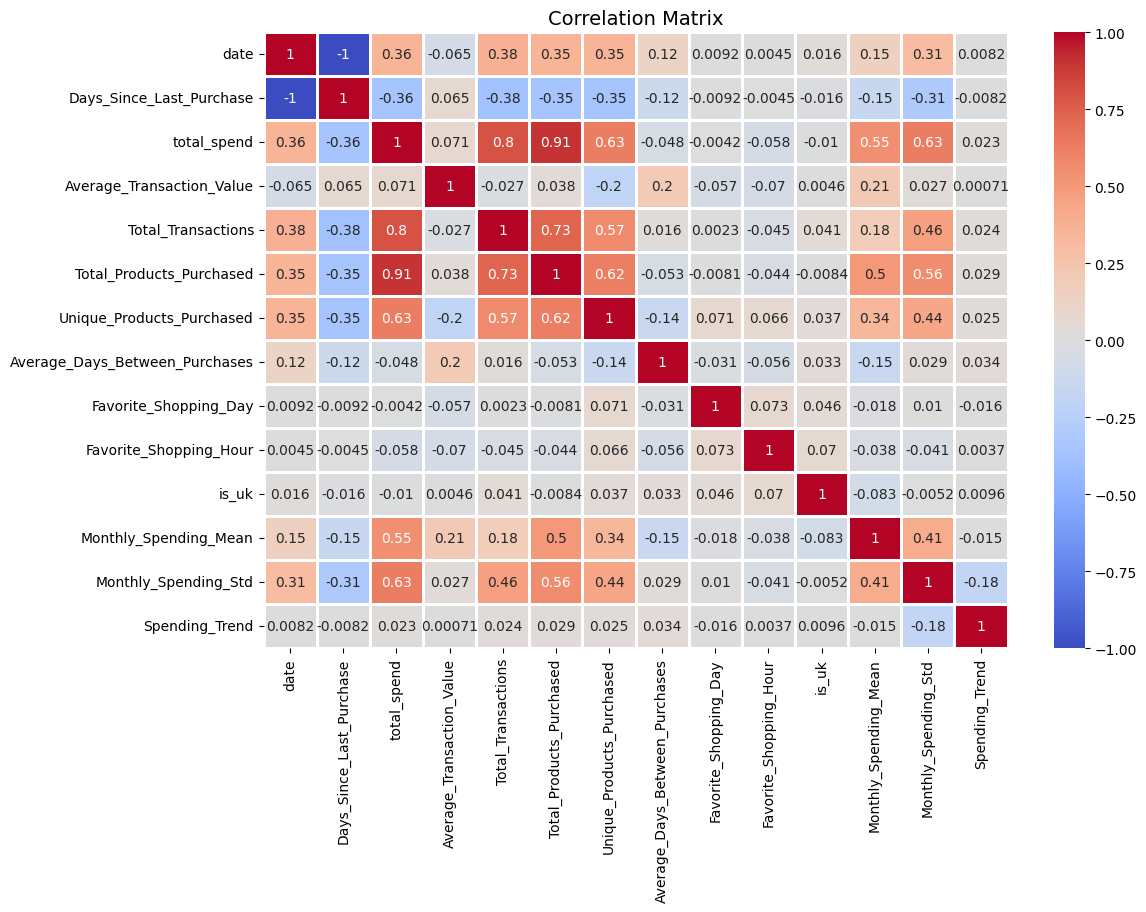

In [76]:
# Correlation matrix to understand relationships between features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
corr = customer_data_cleaned.drop(columns=['customerid']).corr()
sns.heatmap(corr , annot=True , linewidths=2 , cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=14)


In [77]:
# Plot the sales data 
import seaborn as sns
import matplotlib.pyplot as plt


# Plot of sales data by top 10 product category


<Axes: title={'center': 'Top 10 Product Categories by Sales'}, xlabel='totalprice', ylabel='description'>

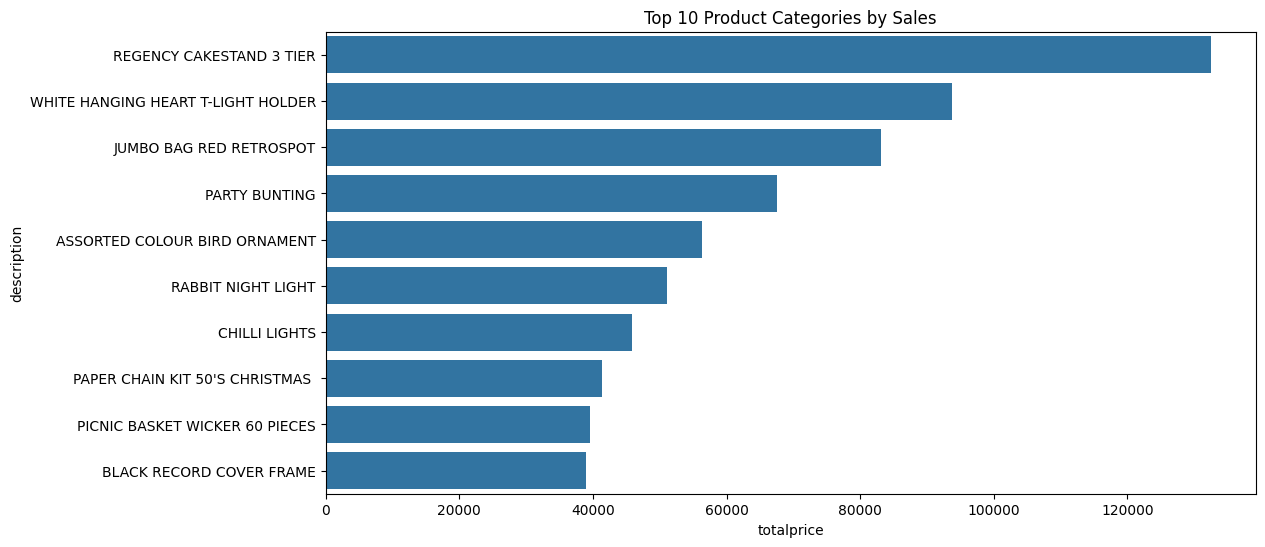

In [78]:

plt.figure(figsize=(12, 6))
plt.title( 'Top 10 Product Categories by Sales')
sns.barplot(category_sales.head(10), y='description', x='totalprice')


In [79]:
# Aggregate sales data by customer country
country_sales = df.groupby('country').agg({'totalprice': 'sum'}).reset_index()
country_sales = country_sales.sort_values(by='totalprice', ascending=False)


In [80]:
country_sales.head()

,country,totalprice
35,United Kingdom,6802545.58
23,Netherlands,283479.54
10,EIRE,246732.47
14,Germany,200619.66
13,France,181385.54


# Plot sales data by top 10 country


<Axes: title={'center': 'Top 10 Countries by Sales'}, xlabel='totalprice', ylabel='country'>

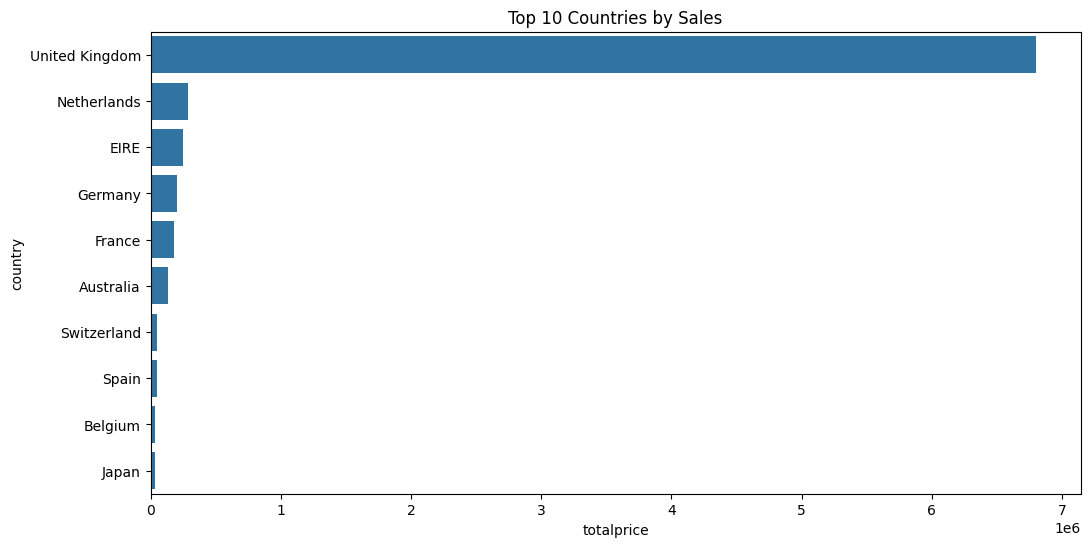

In [81]:

plt.figure(figsize=(12, 6))
plt.title('Top 10 Countries by Sales')  
sns.barplot(country_sales.head(10), y='country', x='totalprice')

# Visualize sales data over time


Text(0.5, 1.0, 'Sales Over Time')

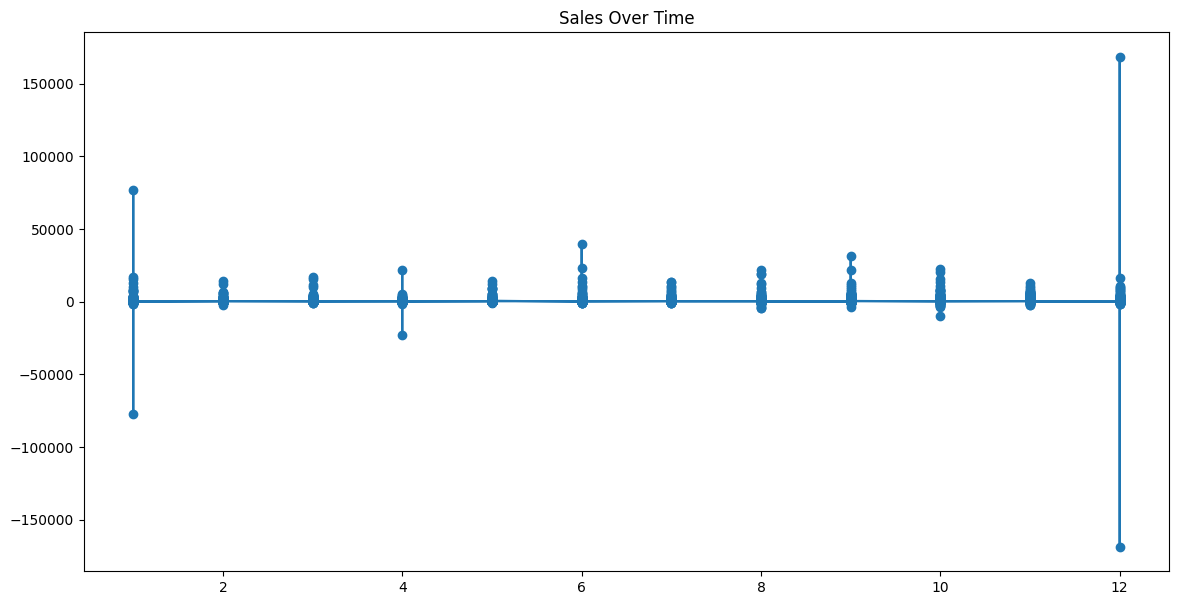

In [82]:

plt.figure(figsize=(14, 7)) 
plt.plot(sales_data['invoicemonth'], sales_data['totalprice'], marker='o')
plt.title('Sales Over Time')

In [83]:
# Feature engineering for time series (lag features, rolling means, etc.)

sales_data['invoicedate'] = pd.to_datetime(df['invoicedate'])
# Create comprehensive time-based features
sales_data['hour'] = sales_data.invoicedate.dt.hour
sales_data['day_of_year'] = sales_data.invoicedate.dt.dayofyear
sales_data['week_of_year'] = sales_data.invoicedate.dt.isocalendar().week
sales_data['weekday']= sales_data.invoicedate.dt.weekday
sales_data['month'] = sales_data.invoicedate.dt.month
sales_data['is_weekend'] = (sales_data['weekday'] >= 5).astype(int)
sales_data['is_month_start'] = sales_data.invoicedate.dt.is_month_start.astype(int)
sales_data['is_month_end'] = sales_data.invoicedate.dt.is_month_end.astype(int)
sales_data['is_quarter_start'] = sales_data.invoicedate.dt.is_quarter_start.astype(int)
sales_data['is_quarter_end'] = sales_data.invoicedate.dt.is_quarter_end.astype(int)

# Season mapping
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

sales_data['season'] = sales_data['month'].apply(get_season)

In [84]:
sales_data

,invoicedate,totalprice,invoicemonth,hour,day_of_year,week_of_year,weekday,month,is_weekend,is_month_start,is_month_end,is_quarter_start,is_quarter_end,season
0,2010-12-01 08:26:00,139.12,12,8,335,48,2,12,0,1,0,0,0,Winter
1,2010-12-01 08:26:00,22.20,12,8,335,48,2,12,0,1,0,0,0,Winter
2,2010-12-01 08:26:00,348.78,12,8,335,48,2,12,0,1,0,0,0,Winter
3,2010-12-01 08:26:00,17.85,12,8,335,48,2,12,0,1,0,0,0,Winter
4,2010-12-01 08:26:00,801.86,12,8,335,48,2,12,0,1,0,0,0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20127,2010-12-14 16:39:00,124.60,12,16,348,50,1,12,0,0,0,0,0,Winter
20128,2010-12-14 16:39:00,140.64,12,16,348,50,1,12,0,0,0,0,0,Winter
20129,2010-12-14 16:39:00,329.05,12,16,348,50,1,12,0,0,0,0,0,Winter
20130,2010-12-14 16:39:00,339.20,12,16,348,50,1,12,0,0,0,0,0,Winter


In [85]:
df.head()


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,totalprice,date,dayofweek,invoice_date,day_of_week,hour,days_diff,year,month
37334,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,2011-01-18,1,2011-01-18 10:01:00,1,10,NaN,2011,1
37339,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6,2011-01-18,1,2011-01-18 10:17:00,1,10,0.0,2011,1
10362,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,25.2,2010-12-07,1,2010-12-07 14:57:00,1,14,NaN,2010,12
10363,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,17.0,2010-12-07,1,2010-12-07 14:57:00,1,14,0.0,2010,12
10364,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,39.0,2010-12-07,1,2010-12-07 14:57:00,1,14,0.0,2010,12


# Lag features

A lag feature shifts a time series backward by a certain number of time steps (lags), allowing your model to learn from past patterns.

In [86]:
# Create lag features for time series
def create_lag_features(df, target_col, lags):
    for lag in lags:
        df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)
    return df
# setting df.invoicedate to datetime
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
# Create daily aggregated data for lag features
daily_agg = df.groupby(df.invoicedate.dt.date).agg({
    'totalprice': 'sum',
    'quantity': 'sum',
    'invoiceno': 'count'
}).rename(columns={'order_id': 'order_count'})

# Add lag features
lags = [1, 7, 14, 30]  # 1 day, 1 week, 2 weeks, 1 month
daily_agg = create_lag_features(daily_agg, 'totalprice', lags)

In [87]:
daily_agg.tail(10)


,totalprice,quantity,invoiceno,totalprice_lag_1,totalprice_lag_7,totalprice_lag_14,totalprice_lag_30
invoicedate,,,,,,,
2011-11-29,47795.56,25684,2651,49077.83,43374.72,27879.22,34632.63
2011-11-30,39840.69,24218,2165,47795.56,47950.01,55826.58,33187.01
2011-12-01,43292.41,24560,2196,39840.69,69390.52,46076.27,45408.90
2011-12-02,43631.53,25203,1968,43292.41,34877.34,46215.65,36522.25
2011-12-04,19943.60,11293,1883,43631.53,25654.22,53625.50,33905.46
2011-12-05,55332.24,37406,3346,19943.60,16923.39,34793.17,31705.20
2011-12-06,42984.87,26613,2590,55332.24,49077.83,29289.83,28373.96
2011-12-07,68347.61,40883,2154,42984.87,47795.56,43374.72,37820.66
2011-12-08,49013.48,26822,2562,68347.61,39840.69,47950.01,59391.75


# Rolling statistics
Rolling statistics (also called moving statistics) in time series feature engineering are statistics computed over a sliding window of past values. They help smooth out short-term fluctuations and highlight longer-term trends or patterns.

📊 What Are Rolling Statistics?
For a given time series, you take a window of fixed size (say, 3 days) and calculate a statistic (like mean, std, min, max) on that window. The window then rolls forward step by step.

 Common Rolling Stats:
rolling_mean (moving average)

rolling_std (moving standard deviation)

rolling_min, rolling_max

rolling_sum

rolling_median

rolling_skew, rolling_kurt (less common but useful)



In [88]:
# Create rolling window features
windows = [7, 14, 30]
for window in windows:
    daily_agg[f'sales_rolling_mean_{window}'] = daily_agg['totalprice'].rolling(window=window).mean()
    daily_agg[f'sales_rolling_std_{window}'] = daily_agg['totalprice'].rolling(window=window).std()
    daily_agg[f'sales_rolling_min_{window}'] = daily_agg['totalprice'].rolling(window=window).min()
    daily_agg[f'sales_rolling_max_{window}'] = daily_agg['totalprice'].rolling(window=window).max()

# Drop rows with NaN values created by lag and rolling features
daily_agg.dropna(inplace=True)

In [89]:
daily_agg.info

<bound method DataFrame.info of              totalprice  quantity  invoiceno  totalprice_lag_1  \
invoicedate                                                      
2011-01-16      6848.44      4061        607          39040.06   
2011-01-17     16247.35      8663        952           6848.44   
2011-01-18      9799.26      6333        525          16247.35   
2011-01-19     21042.22     15736        942           9799.26   
2011-01-20     14683.80      8088        701          21042.22   
...                 ...       ...        ...               ...   
2011-12-05     55332.24     37406       3346          19943.60   
2011-12-06     42984.87     26613       2590          55332.24   
2011-12-07     68347.61     40883       2154          42984.87   
2011-12-08     49013.48     26822       2562          68347.61   
2011-12-09     15606.28      9514        611          49013.48   

             totalprice_lag_7  totalprice_lag_14  totalprice_lag_30  \
invoicedate                           

In [90]:
daily_agg.head()


,totalprice,quantity,invoiceno,totalprice_lag_1,totalprice_lag_7,totalprice_lag_14,totalprice_lag_30,sales_rolling_mean_7,sales_rolling_std_7,sales_rolling_min_7,sales_rolling_max_7,sales_rolling_mean_14,sales_rolling_std_14,sales_rolling_min_14,sales_rolling_max_14,sales_rolling_mean_30,sales_rolling_std_30,sales_rolling_min_30,sales_rolling_max_30
invoicedate,,,,,,,,,,,,,,,,,,,
2011-01-16,6848.44,4061,607,39040.06,21668.34,17334.56,45737.56,23706.450000,18506.752155,6848.44,59042.51,20351.255714,15041.624470,4776.12,59042.51,25389.391333,14256.628507,4776.12,59042.51
2011-01-17,16247.35,8663,952,6848.44,15334.53,15415.71,45623.47,23836.852857,18441.029192,6848.44,59042.51,20410.658571,15022.263212,4776.12,59042.51,24410.187333,13821.130751,4776.12,59042.51
2011-01-18,9799.26,6333,525,16247.35,14763.70,4776.12,22207.68,23127.647143,18936.914775,6848.44,59042.51,20769.454286,14676.118220,5200.37,59042.51,23996.573333,14072.695333,4776.12,59042.51
2011-01-19,21042.22,15736,942,9799.26,59042.51,5200.37,30543.61,17699.034286,10486.683751,6848.44,39040.06,21901.015000,13977.459323,6848.44,59042.51,23679.860333,14027.113111,4776.12,59042.51
2011-01-20,14683.80,8088,701,21042.22,16133.55,10858.36,30061.75,17491.927143,10536.949746,6848.44,39040.06,22174.260714,13780.991581,6848.44,59042.51,23167.262000,14066.780431,4776.12,59042.51


# Time series analysis 


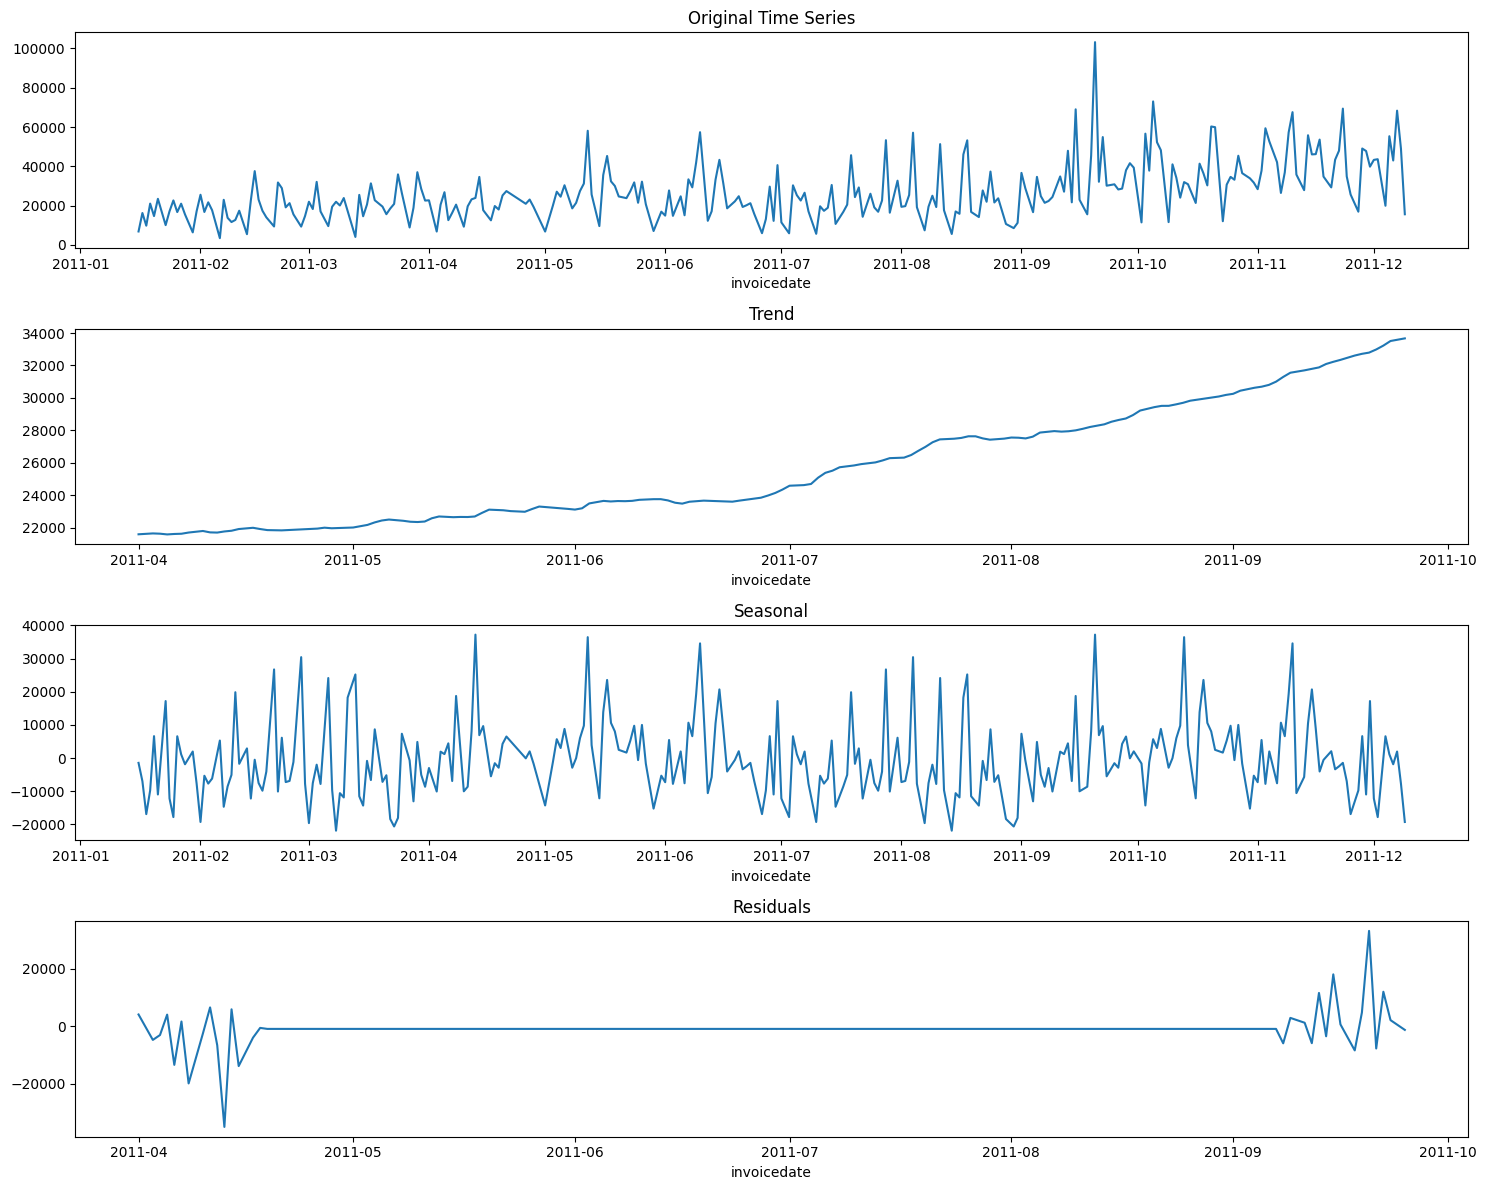

In [91]:
 # Perform seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(daily_agg['totalprice'], model='additive', period=130)

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

decomposition.observed.plot(ax=axes[0], title='Original Time Series')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residuals')

plt.tight_layout()
plt.show()

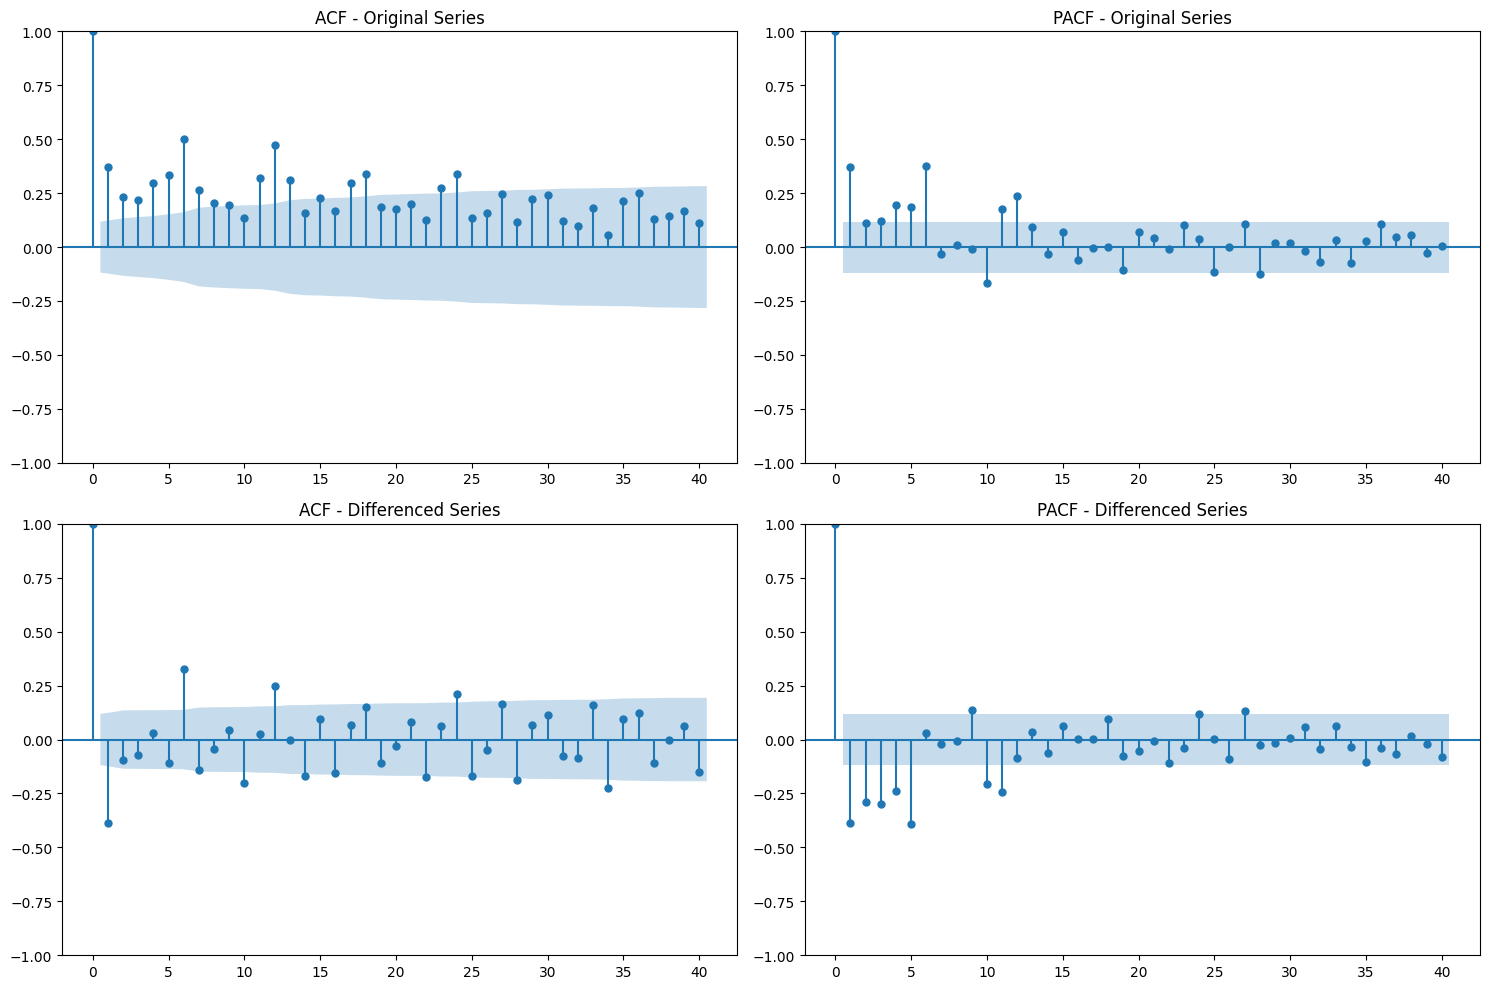

In [92]:
#Auto correlation analysis

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
daily_agg['sales_diff'] = daily_agg['totalprice'].diff()

plot_acf(daily_agg['totalprice'].dropna(), ax=axes[0,0], lags=40)
plot_pacf(daily_agg['totalprice'].dropna(), ax=axes[0,1], lags=40)
plot_acf(daily_agg['sales_diff'].dropna(), ax=axes[1,0], lags=40)
plot_pacf(daily_agg['sales_diff'].dropna(), ax=axes[1,1], lags=40)

axes[0,0].set_title('ACF - Original Series')
axes[0,1].set_title('PACF - Original Series')
axes[1,0].set_title('ACF - Differenced Series')
axes[1,1].set_title('PACF - Differenced Series')

plt.tight_layout()
plt.show()

In [93]:
# save the processed data
# daily_agg.to_csv('C:/Users/sawan/e-commerce_Project/data/processed/daily_sales_data.csv', index=False)
# sales_data.to_csv('C:/Users/sawan/e-commerce_Project/data/processed/sales_data.csv', index=False)
customer_data_cleaned.to_csv('C:/Users/sawan/e-commerce_Project/data/processed/customer_data.csv', index=False)